In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

In [3]:
data = pd.read_csv('tips.csv')
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [8]:
data.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

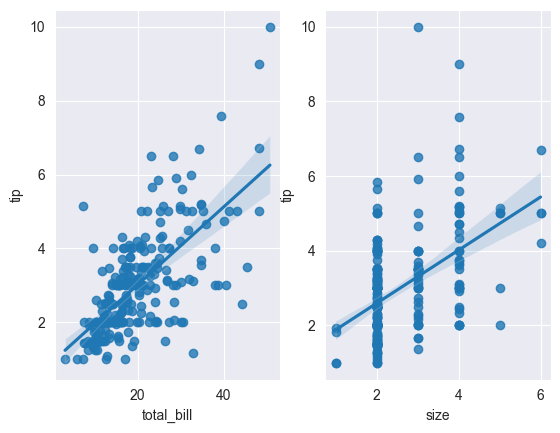

In [10]:
plt.subplot(1,2,1)
sns.regplot(data=data, x='total_bill', y='tip')
plt.subplot(1,2,2)
sns.regplot(data=data, x='size', y="tip")
plt.show()

In [12]:
men_tips = data[data['sex']=='Male']
women_tips = data[data['sex']=='Female']
print("Men tips mean",men_tips["tip"].mean(), "\nWomen tips mean", women_tips["tip"].mean())

Men tips 3.0896178343949043 
Women tips 2.8334482758620685


In [13]:
smoke_tips = data[data['smoker']=='Yes']
no_smoke_tips = data[data['smoker']=='No']
print("Smoke tips mean",smoke_tips["tip"].mean(), "\nNo smoke tips mean", no_smoke_tips["tip"].mean())

Smoke tips mean 3.008709677419355 
No smoke tips mean 2.9918543046357615


<Axes: xlabel='day', ylabel='tip'>

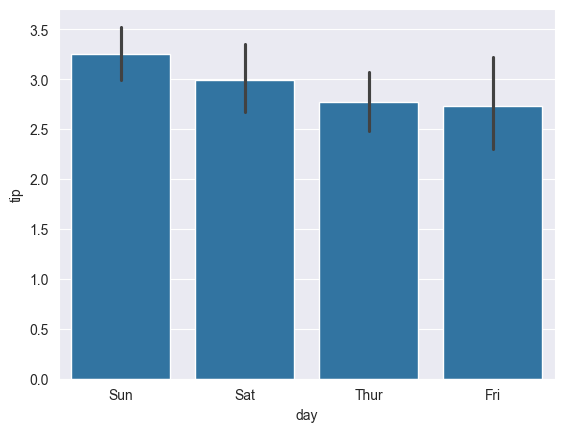

In [14]:
sns.barplot(data=data, x="day", y="tip" )

In [15]:
data["sex"] = data["sex"].map({'Male':'1', 'Female':'0'})
data["smoker"] = data["smoker"].map({"No": 0, "Yes": 1})
data["day"] = data["day"].map({"Thur": 0, "Fri": 1, "Sat": 2, "Sun": 3})
data["time"] = data["time"].map({"Lunch": 0, "Dinner": 1})
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,3,1,2
1,10.34,1.66,1,0,3,1,3
2,21.01,3.50,1,0,3,1,3
3,23.68,3.31,1,0,3,1,2
4,24.59,3.61,0,0,3,1,4


In [23]:
X = data.drop('tip', axis=1)
y = data['tip']
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.5830897914069042

In [22]:
features = np.array([[24.50, 1, 0, 0, 1, 4]])
print(model.predict(features))

[3.54335633]


C:\Users\vlads\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
